# Data Preprocessing 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image 
from IPython.display import display 
from PIL import Image

In [19]:
DataDir = "E:/asl_alphabet_train/asl_alphabet_train"

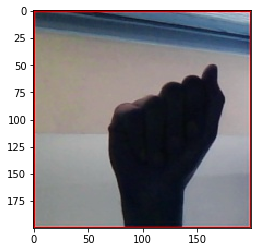

In [20]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [21]:
print(img_array.shape)

(200, 200, 3)


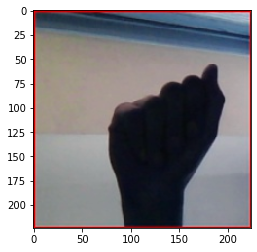

In [22]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [23]:
training_data = []

In [24]:
def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])

In [25]:
create_training_data()

In [26]:
print(len(training_data))

11990


In [27]:
import random
random.shuffle(training_data)
len(training_data)

11990

In [28]:
x_train = []
y_train = []

for features, labels in training_data:
    x_train.append(features)
    y_train.append(labels)

In [29]:
x_train = np.asarray(x_train)
x_train = np.array(x_train).reshape(x_train.shape[0], img_size, img_size, 3)
x_train.shape

(11990, 224, 224, 3)

In [30]:
y_train = np.asarray(y_train)
y_train = np.array(y_train).reshape(-1, 1)
y_train.shape

(11990, 1)

In [31]:
from keras.utils import np_utils
# One-hot encode the training labels
y_train = np_utils.to_categorical(y_train)

In [32]:
y_train.shape

(11990, 4)

In [33]:
import pickle

pickle_out = open("x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [34]:
pickle_in = open("x_train.pickle", "rb")
x_train = pickle.load(pickle_in)